/Users/johannamoeller/opt/anaconda3/envs/environmentGroup4/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


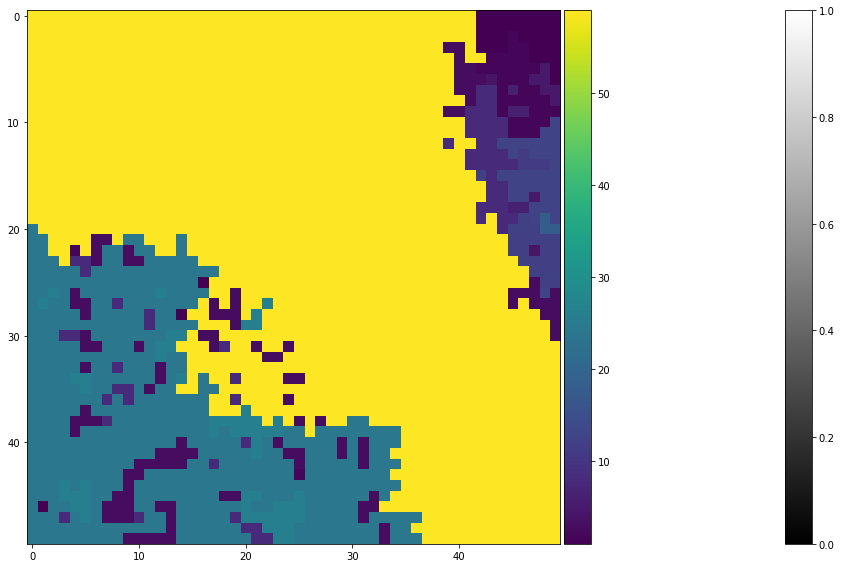

In [76]:
import skimage.io as sk
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from Functions import image_processing as ip
from skimage import color
from skimage import io

gtimage = sk.imread("../Data/N2DH-GOWT1/gt/man_seg01.tif")
gt01 = np.ndarray.clip(gtimage,0, 1) # background is 0; regions are 1
# ip.show_image(gt01, 15, 8)
im = Image.fromarray(gt01)
im.save("gt01safe.tif")


gt01_resize = gt01[300:350, 400:450]
ip.show_image(gt01_resize, 15, 8)

imgimage = sk.imread("../t01tifimg.tif") # insegesamt 59 Regionen in Img1
np.any(imgimage >= 59)
sk.imshow(imgimage)


#imgGray = color.rgb2gray(imgimage)
#sk.imshow(imgGray)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


(array([   0.,    0.,    0.,    0.,    0., 2500.,    0.,    0.,    0.,
           0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5],
       dtype=float32),
 <BarContainer object of 10 artists>)

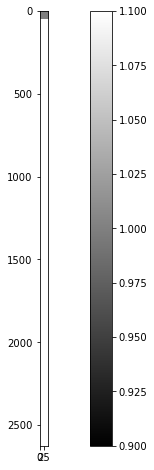

In [66]:
def imgclip (img, T1):
    for i in range(0, img.shape[0]):
        for j in range(0, img.shape[1]):
            intens = img[i, j]
            if intens == T1:
                img[i, j] = 0
            else:
                img[i, j] = 1
    return img

img01 = imgclip(imgimage, 58)
np.any(img01 == 1)
print(img01)
#img01 = np.ndarray.clip(imgimage,0, 1) # background is 0; regions are 1
ip.show_image(img01, 15, 8)
plt.hist(img01.flatten())